In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the csv file into a pandas dataframe

data = pd.read_csv("/content/drive/MyDrive/COVID_Data_Basic.csv")

In [5]:
# checking the head and tail of dataset
data

,Unnamed: 0,Country,Date,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
0,1,Afghanistan,2019-12-31,0,0,0,0,0,0
1,2,Afghanistan,2020-01-01,0,0,0,0,0,0
2,3,Afghanistan,2020-01-02,0,0,0,0,0,0
3,4,Afghanistan,2020-01-03,0,0,0,0,0,0
4,5,Afghanistan,2020-01-04,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
54517,55096,Zimbabwe,2020-11-02,8389,245,7939,15,2,12
54518,55097,Zimbabwe,2020-11-03,8410,246,7942,21,1,3
54519,55098,Zimbabwe,2020-11-04,8427,248,7967,17,2,25
54520,55099,Zimbabwe,2020-11-05,8444,248,7975,17,0,8


In [6]:
# checking all features

data.columns

Index(['Unnamed: 0', 'Country', 'Date', 'Confirmed', 'Death', 'Recovered',
       'newConfirmed', 'newDeath', 'newRecovered'],
      dtype='object')

In [7]:
data.describe()

,Unnamed: 0,Confirmed,Death,Recovered,newConfirmed,newDeath,newRecovered
count,54522.000000,5.452200e+04,54522.000000,5.452200e+04,54522.000000,54522.000000,54522.000000
mean,47924.672939,7.293357e+04,2559.091981,4.584383e+04,904.639705,22.795734,595.733997
std,78141.410559,4.540187e+05,13334.101849,3.002110e+05,5118.383587,122.875597,4336.617112
min,1.000000,0.000000e+00,0.000000,0.000000e+00,-10034.000000,-1918.000000,-16298.000000
25%,14351.250000,2.400000e+01,0.000000,5.000000e+00,0.000000,0.000000,0.000000
50%,30946.500000,1.368500e+03,26.000000,6.010000e+02,11.000000,0.000000,1.000000
75%,47550.750000,1.582800e+04,319.000000,7.930500e+03,193.000000,3.000000,82.000000
max,550910.000000,9.733816e+06,236073.000000,7.819886e+06,126480.000000,4143.000000,388340.000000


In [8]:
# checking the data types of columns

data.dtypes

Unnamed: 0       int64
Country         object
Date            object
Confirmed        int64
Death            int64
Recovered        int64
newConfirmed     int64
newDeath         int64
newRecovered     int64
dtype: object

We need to change type of "Date" feature from object to datetime.

In [9]:
# converting data type of "Date" feature to datetime

data["Date"] = pd.to_datetime(data["Date"])

In [10]:
data.dtypes

Unnamed: 0               int64
Country                 object
Date            datetime64[ns]
Confirmed                int64
Death                    int64
Recovered                int64
newConfirmed             int64
newDeath                 int64
newRecovered             int64
dtype: object

The type of "Date" column changed successfully.

In [11]:
# check number of Null values

data.isnull().sum()

Unnamed: 0      0
Country         0
Date            0
Confirmed       0
Death           0
Recovered       0
newConfirmed    0
newDeath        0
newRecovered    0
dtype: int64

The dataset has not Null values.

In [12]:
data["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Irelan

With regard to columns, firstly I will analyze confirmed patients, then dead persons during time, and finally recovered patients.

# *Analysis of Confirmed Cases*

In [41]:
# number of Confirmed cased per each date

confirmed = data.groupby("Date", as_index=False).Confirmed.sum()

In [42]:
confirmed

,Date,Confirmed
0,2019-12-31,27
1,2020-01-01,27
2,2020-01-02,27
3,2020-01-03,44
4,2020-01-04,44
...,...,...
307,2020-11-02,47011161
308,2020-11-03,47493178
309,2020-11-04,48090690
310,2020-11-05,48680103


We can see how number of confirmed cases has been increased in 312 days from 2019 to 2020.

(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text major ticklabel objects>)

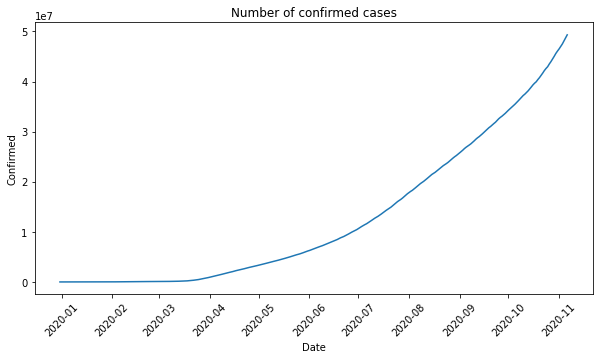

In [62]:
# plotting a graph for confirmed cases

plt.figure(figsize=(10,5))
sns.lineplot(x=confirmed["Date"], y=confirmed["Confirmed"])
plt.title("Number of confirmed cases")
plt.xticks(rotation=45)

In [78]:
# the countries with number of confirmed cases

num_confirmed = data.groupby("Country", as_index=False).Confirmed.max()

In [79]:
num_confirmed

,Country,Confirmed
0,Afghanistan,41975
1,Albania,23210
2,Algeria,60800
3,Andorra,5135
4,Angola,12223
...,...,...
189,West Bank and Gaza,57226
190,Western Sahara,10
191,Yemen,2067
192,Zambia,16819


Because plotting 194 countries in one chart is not helpful, I only will check 10 countries with most number of confirmed cases.

In [80]:
# top 10 countries with most number of confirmed cases
top_confirmed = num_confirmed.sort_values(by="Confirmed", ascending=False)
top_confirmed_10 = top_confirmed.head(10)

In [81]:
top_confirmed_10

,Country,Confirmed
180,US,9733816
82,India,8462080
24,Brazil,5631181
145,Russia,1720063
64,France,1709716
164,Spain,1328832
6,Argentina,1228814
184,United Kingdom,1149791
38,Colombia,1127733
118,Mexico,955128


Text(0.5, 1.0, 'top 10 countries with the most confirmed cases')

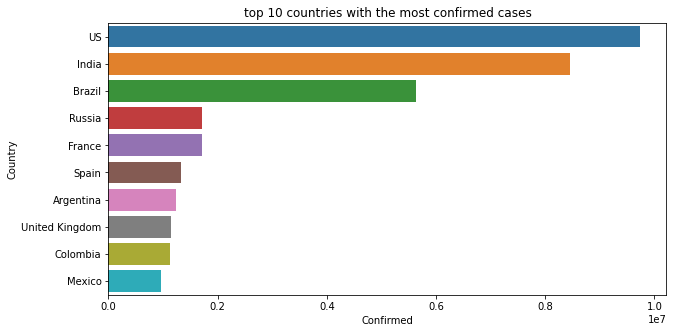

In [61]:
# plotting a graph for countries with maximum number of confirmed cases

plt.figure(figsize=(10,5))
sns.barplot(x=top_confirmed_10["Confirmed"], y=top_confirmed_10["Country"])
plt.title("top 10 countries with the most confirmed cases")

# *Analysis of Deaths*

In [64]:
# number of Death per each date

death = data.groupby("Date", as_index=False).Death.sum()

In [65]:
death

,Date,Death
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0
...,...,...
307,2020-11-02,1206168
308,2020-11-03,1214178
309,2020-11-04,1225202
310,2020-11-05,1233313


(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text major ticklabel objects>)

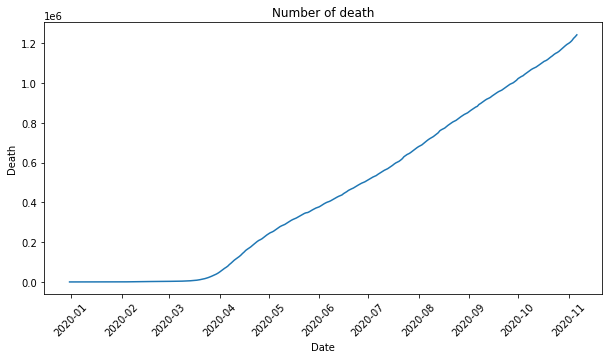

In [67]:
# plotting a graph for number of deaths

plt.figure(figsize=(10,5))
sns.lineplot(x=death["Date"], y=death["Death"])
plt.title("Number of death")
plt.xticks(rotation=45)

In [74]:
# the countries with their number of deaths

num_death = data.groupby("Country", as_index=False).Death.max()

In [75]:
num_death

,Country,Death
0,Afghanistan,1554
1,Albania,549
2,Algeria,2024
3,Andorra,75
4,Angola,300
...,...,...
189,West Bank and Gaza,511
190,Western Sahara,1
191,Yemen,602
192,Zambia,349


In [76]:
# top 10 countries with most number of deaths
top_death = num_death.sort_values(by="Death", ascending=False)
top_death_10 = top_death.head(10)

In [77]:
top_death_10

,Country,Death
180,US,236073
24,Brazil,162015
82,India,125562
118,Mexico,94323
184,United Kingdom,48565
88,Italy,40638
64,France,39916
164,Spain,38833
84,Iran,37409
139,Peru,34730


Text(0.5, 1.0, 'top 10 countries with the most number of deaths')

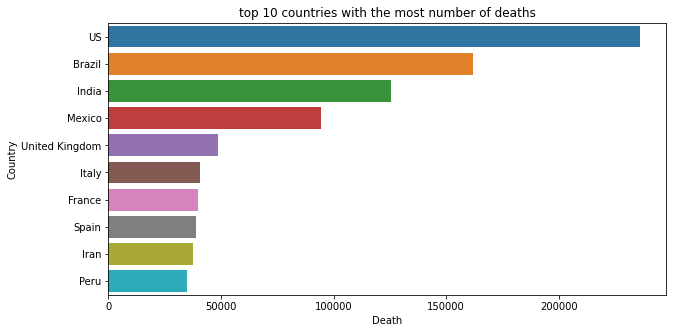

In [72]:
# plotting a graph for countries with maximum number of deaths

plt.figure(figsize=(10,5))
sns.barplot(x=top_death_10["Death"], y=top_death_10["Country"])
plt.title("top 10 countries with the most number of deaths")

# *Analysis of Recovered Cases*

In [82]:
# number of recovered cases per each date

recovered = data.groupby("Date", as_index=False).Recovered.sum()

In [83]:
recovered

,Date,Recovered
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0
...,...,...
307,2020-11-02,31357886
308,2020-11-03,31609242
309,2020-11-04,31889030
310,2020-11-05,32192465


(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text major ticklabel objects>)

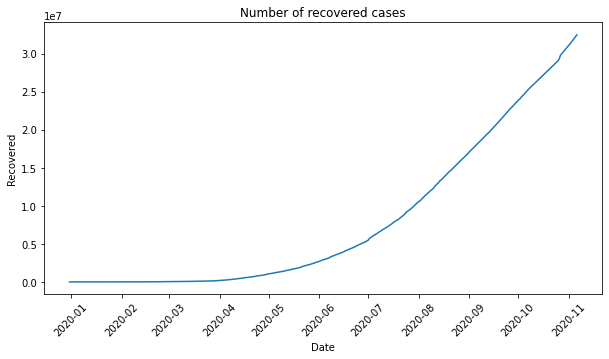

In [84]:
# plotting a graph for number of recovered cases

plt.figure(figsize=(10,5))
sns.lineplot(x=recovered["Date"], y=recovered["Recovered"])
plt.title("Number of recovered cases")
plt.xticks(rotation=45)

Because recovered feature is a relative one, so we need to analyze number of recovered cases compared to number of confirmed cases. So, I will make a new dataframe with these two numbers and then analyze the ratio between them.

In [90]:
# nmber of recovered cases for each country

num_recovered = data.groupby("Country", as_index=False).Recovered.max()

In [91]:
num_recovered

,Country,Recovered
0,Afghanistan,34440
1,Albania,11861
2,Algeria,41510
3,Andorra,3858
4,Angola,5626
...,...,...
189,West Bank and Gaza,49537
190,Western Sahara,8
191,Yemen,1375
192,Zambia,15862


In [92]:
# new dataframe with number of confirmed and recovered cases

data_ratio = pd.merge(num_confirmed, num_recovered, on='Country')

In [93]:
data_ratio

,Country,Confirmed,Recovered
0,Afghanistan,41975,34440
1,Albania,23210,11861
2,Algeria,60800,41510
3,Andorra,5135,3858
4,Angola,12223,5626
...,...,...,...
189,West Bank and Gaza,57226,49537
190,Western Sahara,10,8
191,Yemen,2067,1375
192,Zambia,16819,15862


In [94]:
# division of number of recovered cases over confirmed cases

data_ratio["Ratio"] = data_ratio["Recovered"]/data_ratio["Confirmed"]

In [95]:
data_ratio

,Country,Confirmed,Recovered,Ratio
0,Afghanistan,41975,34440,0.820488
1,Albania,23210,11861,0.511030
2,Algeria,60800,41510,0.682730
3,Andorra,5135,3858,0.751315
4,Angola,12223,5626,0.460280
...,...,...,...,...
189,West Bank and Gaza,57226,49537,0.865638
190,Western Sahara,10,8,0.800000
191,Yemen,2067,1375,0.665215
192,Zambia,16819,15862,0.943100


In [111]:
top_ratio = data_ratio.sort_values(by="Ratio", ascending=False)
top_ratio_10 = top_ratio.head(10)

In [112]:
top_ratio_10

,Country,Confirmed,Recovered,Ratio
147,Saint Kitts and Nevis,19,19,1.000000
157,Singapore,58047,57959,0.998484
43,Cote d'Ivoire,20801,20477,0.984424
65,Gabon,9022,8878,0.984039
155,Seychelles,158,155,0.981013
31,Cambodia,294,288,0.979592
183,United Arab Emirates,139891,136936,0.978876
143,Qatar,133811,130881,0.978103
51,Djibouti,5604,5481,0.978051
167,Suriname,5227,5102,0.976086


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

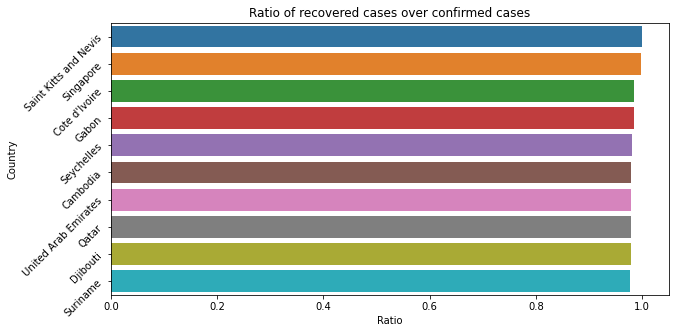

In [119]:
# plotting a graph for top 10 countries with highest ratio of recovered/confirmed cases

plt.figure(figsize=(10,5))
sns.barplot(x=top_ratio_10["Ratio"], y=top_ratio_10["Country"])
plt.title("Ratio of recovered cases over confirmed cases")
plt.yticks(rotation=45)